In [ ]:
pip install pillow

In [ ]:
pip install numpy

Saving watch-dogs-logo-png-transparent.png to watch-dogs-logo-png-transparent.png


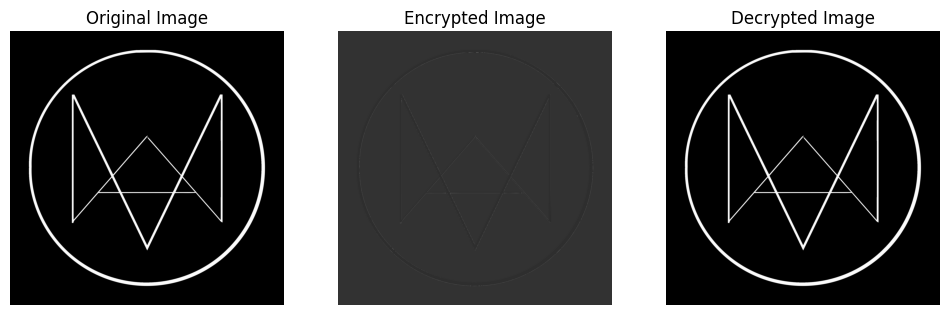

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt  # Import matplotlib for image display

def encrypt_image(image_path, key):
    # Open the image and convert it to RGB format
    image = Image.open(image_path).convert('RGB')
    pixels = np.array(image)

    # Create a copy of the pixels for encrypted image
    encrypted_pixels = np.copy(pixels)

    # Perform encryption by adding the key value to each pixel
    encrypted_pixels = (encrypted_pixels + key) % 256  # Ensure pixel values stay within [0, 255]
    encrypted_pixels = encrypted_pixels.astype(np.uint8)  # Convert to uint8

    # Convert back to an image
    encrypted_image = Image.fromarray(encrypted_pixels)
    return encrypted_image

# Function to decrypt the image
def decrypt_image(encrypted_image, key):
    # Convert image back to numpy array
    encrypted_pixels = np.array(encrypted_image)

    # Create a copy of the pixels for decrypted image
    decrypted_pixels = np.copy(encrypted_pixels)

    # Perform decryption by subtracting the key value from each pixel
    decrypted_pixels = (decrypted_pixels - key) % 256  # Ensure pixel values stay within [0, 255]
    decrypted_pixels = decrypted_pixels.astype(np.uint8)  # Convert to uint8

    # Convert back to an image
    decrypted_image = Image.fromarray(decrypted_pixels)
    return decrypted_image

# Function to display images
def display_images(original, encrypted, decrypted):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.title("Original Image")
    plt.imshow(original)
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title("Encrypted Image")
    plt.imshow(encrypted)
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.title("Decrypted Image")
    plt.imshow(decrypted)
    plt.axis('off')

    plt.show()

# Upload an image
from google.colab import files
uploaded = files.upload()

# Assuming the uploaded file is the image to be encrypted
image_path = next(iter(uploaded))  # Get the uploaded file name

# Set a key for encryption and decryption
key = 50

# Encrypt the image
encrypted_image = encrypt_image(image_path, key)

# Decrypt the image
decrypted_image = decrypt_image(encrypted_image, key)

# Display the original, encrypted, and decrypted images
original_image = Image.open(image_path).convert('RGB')
display_images(original_image, encrypted_image, decrypted_image)
